In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

**1.Drop null values**

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
newdf = data.dropna(axis = 1)

sorted(newdf.columns)

**2.Seperate qualitative and quantitative attributes**

quantitative part

In [6]:
numd = newdf.select_dtypes(np.number)
numd.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


qualitative part

In [7]:
catd = newdf.select_dtypes(object)
catd.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


**3.Feature selection on quantitative attributes**

In [8]:
from sklearn.feature_selection import SelectKBest,chi2

In [9]:
X = numd.drop('SalePrice',axis = 1)
y = numd['SalePrice']

In [10]:
bestfeat = SelectKBest(score_func = chi2,k = 10)
fit = bestfeat.fit(X,y)
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(X.columns)
featscores = pd.concat([cols,scores],axis = 1)

In [11]:
featscores.columns = ['specs','scores']
print(featscores.nlargest(10,'scores'))

           specs        scores
2        LotArea  1.011497e+07
31       MiscVal  6.253332e+06
12      2ndFlrSF  4.648841e+05
7     BsmtFinSF1  3.999851e+05
30      PoolArea  3.835642e+05
8     BsmtFinSF2  3.688827e+05
9      BsmtUnfSF  2.747512e+05
13  LowQualFinSF  2.448810e+05
14     GrLivArea  1.968501e+05
10   TotalBsmtSF  1.747065e+05


In [12]:
featscores.nlargest(10,'scores')['specs'].to_list()

['LotArea',
 'MiscVal',
 '2ndFlrSF',
 'BsmtFinSF1',
 'PoolArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotalBsmtSF']

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
ext =  ExtraTreesRegressor()
ext.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:
print(ext.feature_importances_)

[0.00660709 0.0068209  0.01246098 0.31773493 0.00848013 0.04868595
 0.02283517 0.02423134 0.00225686 0.00479864 0.03331241 0.03415454
 0.01759379 0.00064249 0.08346307 0.00935973 0.00442212 0.06019557
 0.00694498 0.00925622 0.00357881 0.01796444 0.02534691 0.16976936
 0.0364193  0.00647513 0.00661884 0.00239151 0.00171265 0.00288382
 0.00287232 0.0005082  0.00552    0.0036818 ]


In [15]:
feat_importances = pd.Series(ext.feature_importances_,index = X.columns)

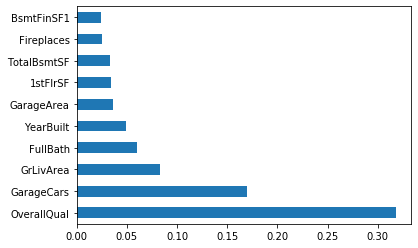

In [16]:
feat_importances.nlargest(10).plot(kind = 'barh')

In [17]:
numd.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
numd_red = numd[['OverallQual','GarageCars','GrLivArea']]

In [19]:
numd_red.head()

,OverallQual,GarageCars,GrLivArea
0,7,2,1710
1,6,2,1262
2,7,2,1786
3,7,3,1717
4,8,3,2198


**The features we can select are OverallQual,GarageCars,GRLIvArea**

**4.Feature selection on qualitative attributes**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectFromModel
rfc = RandomForestClassifier()

In [23]:
def prepare(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = pd.DataFrame(oe.transform(X))
    X_enc.columns = X.columns
    return X_enc
catd_enc = prepare(catd)

In [24]:
catd.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
catd.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [26]:
catd_enc.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,4.0,2.0,1.0,0.0,1.0,2.0,6.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,4.0,1.0,1.0,0.0,1.0,3.0,6.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,4.0,2.0,1.0,0.0,1.0,2.0,6.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,4.0,0.0,1.0,2.0,1.0,2.0,6.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,4.0,2.0,1.0,0.0,1.0,2.0,6.0,2.0,8.0,4.0


In [27]:
rfc.fit(catd_enc,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
feat_importances = pd.Series(rfc.feature_importances_,index = catd_enc.columns)

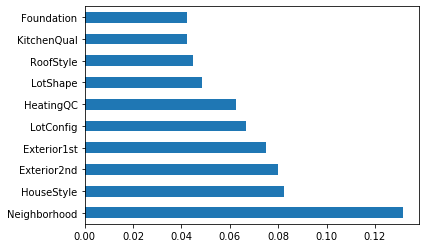

In [29]:
feat_importances.nlargest(10).plot(kind = 'barh')

**We can take Neighborhood,HouseStlpe**

**5.Corelation matrix for quantitative attributes and drop high correlated attributes**

In [30]:
catd_red = catd[['Neighborhood','HouseStyle']]

In [31]:
fulld = pd.concat([numd_red,catd_red],axis = 1)
fulld = pd.concat([fulld,y],axis = 1)
fulld.head()

,OverallQual,GarageCars,GrLivArea,Neighborhood,HouseStyle,SalePrice
0,7,2,1710,CollgCr,2Story,208500
1,6,2,1262,Veenker,1Story,181500
2,7,2,1786,CollgCr,2Story,223500
3,7,3,1717,Crawfor,2Story,140000
4,8,3,2198,NoRidge,2Story,250000


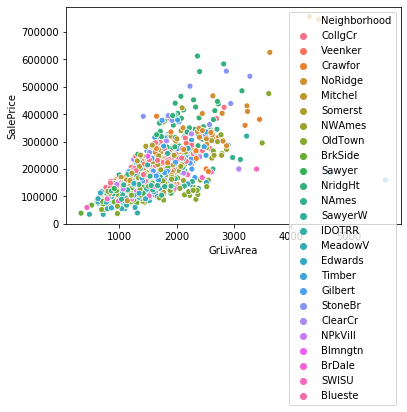

In [32]:
sns.scatterplot(x = 'GrLivArea',y = 'SalePrice',hue = 'Neighborhood',data = fulld)

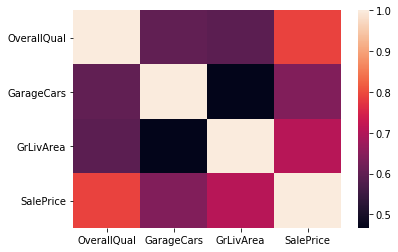

In [33]:
fulld_corr = fulld.corr()
sns.heatmap(fulld_corr)

**6.Encode qualitative attributes**

In [34]:
fulld1 = pd.get_dummies(fulld[['Neighborhood','HouseStyle']],drop_first = True)

In [35]:
fulld1 = pd.DataFrame(fulld1)

In [36]:
fulld1.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
full = fulld.drop(['Neighborhood','HouseStyle'],axis = 1)

In [38]:
full.head()

,OverallQual,GarageCars,GrLivArea,SalePrice
0,7,2,1710,208500
1,6,2,1262,181500
2,7,2,1786,223500
3,7,3,1717,140000
4,8,3,2198,250000


In [39]:
fulld1.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**7.Create new data frame by concatenating selected Qualitative and Quantitative attributes**

In [40]:
fulld_enc = pd.concat([full,fulld1],axis = 1)
fulld_enc.head()

,OverallQual,GarageCars,GrLivArea,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,7,2,1710,208500,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,6,2,1262,181500,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,7,2,1786,223500,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,7,3,1717,140000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,8,3,2198,250000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**8.Apply Machine learning algorithm to predict**

In [41]:
from sklearn.model_selection import train_test_split
X = fulld_enc.drop('SalePrice',axis = 1)
y = fulld['SalePrice'] / fulld['SalePrice'].mean()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [42]:
from sklearn.svm import LinearSVR
svr = LinearSVR(epsilon = 0.0001,C = 0.1,loss = 'squared_epsilon_insensitive',dual = False,tol = 0.00001,intercept_scaling = 0.01)
svr.fit(X_train,y_train)

LinearSVR(C=0.1, dual=False, epsilon=0.0001, fit_intercept=True,
          intercept_scaling=0.01, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=1e-05, verbose=0)

In [43]:
svr.score(X_test,y_test)

0.7914118181460744

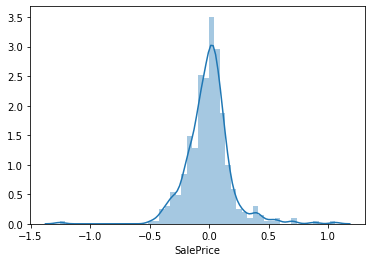

In [44]:
sns.distplot(y_test - svr.predict(X_test))

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
print(mean_absolute_error(y_test,svr.predict(X_test)))

0.12824220753996507


**We got 80% accuracy.**